In [1]:
#Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Mention basic stats about the dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Preprocessing the dataset

In [8]:
#checking for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory Data Analysis

<Axes: >

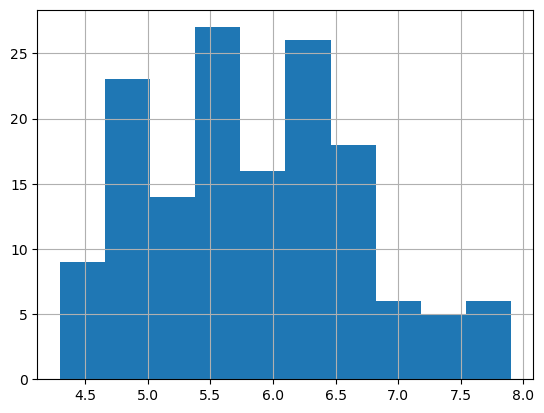

In [9]:
#Plotting graphs
df['sepal_length'].hist()

<Axes: >

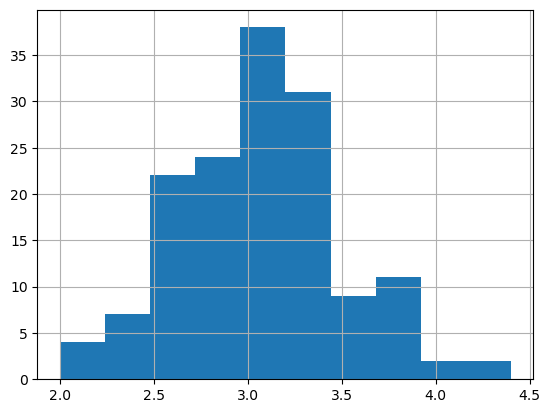

In [10]:
df['sepal_width'].hist()

<Axes: >

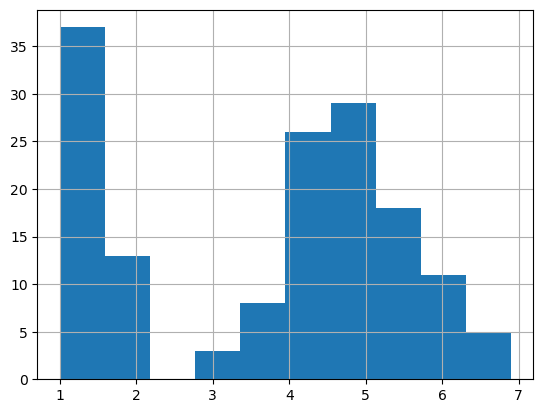

In [11]:
df['petal_length'].hist()

<Axes: >

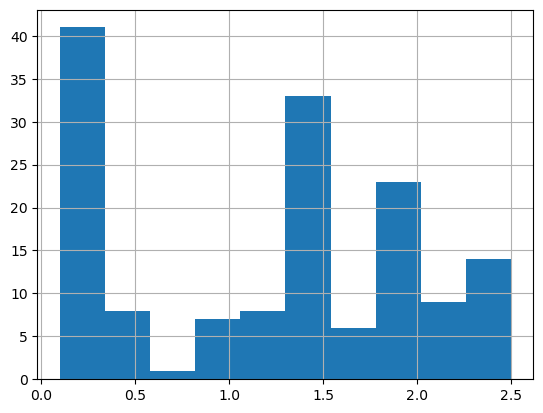

In [12]:
df['petal_width'].hist()

In [17]:
#scatterplot
colors = ['pink','orange','red']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

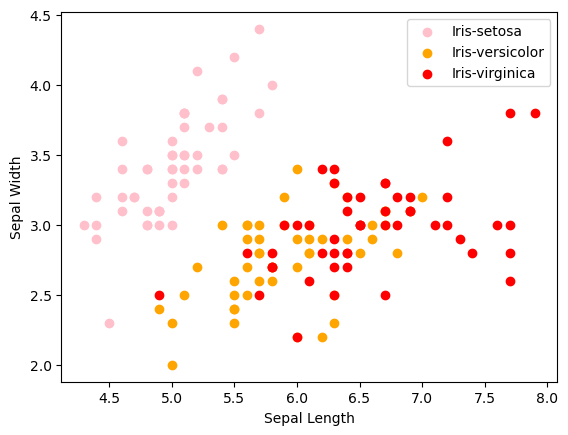

In [18]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label = species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

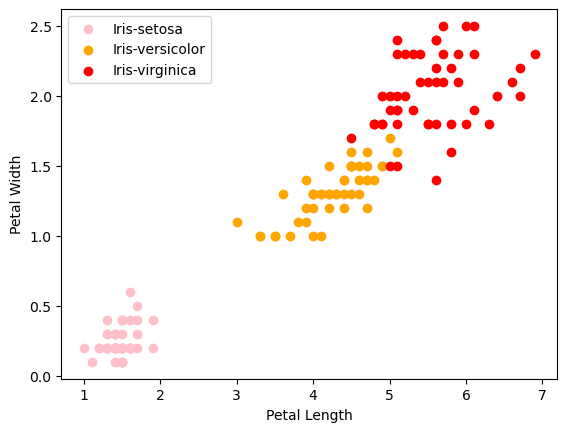

In [19]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label = species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

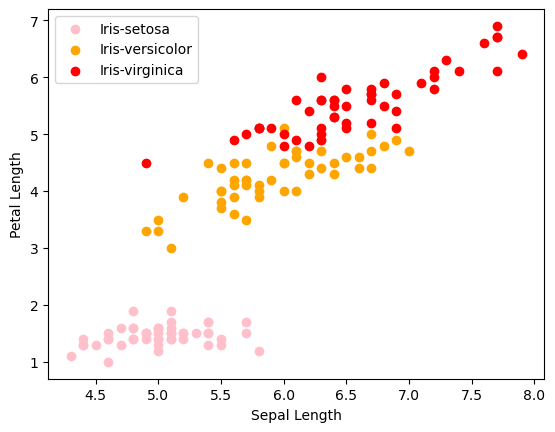

In [21]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label = species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

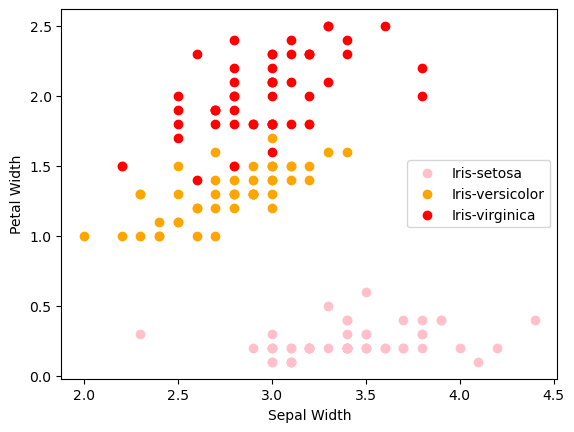

In [22]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label = species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

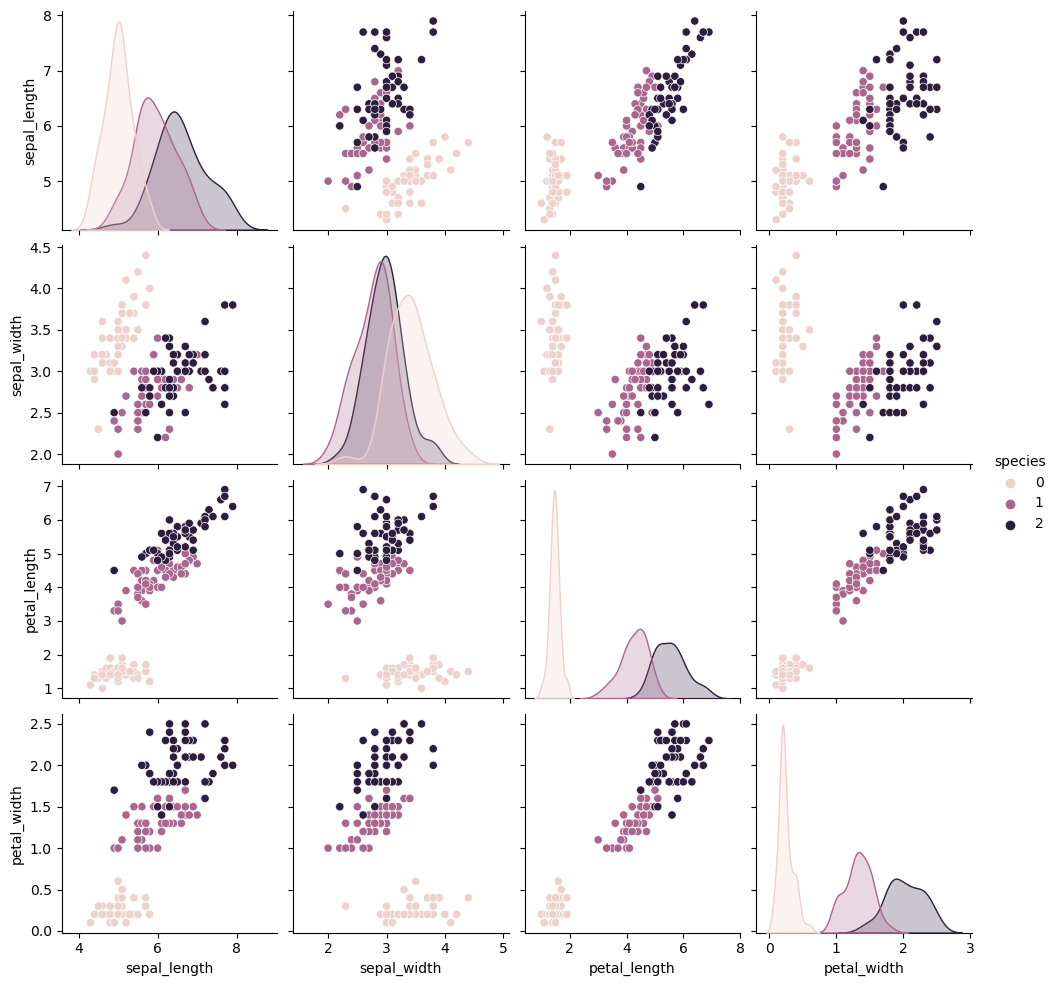

In [116]:
sns.pairplot(df, hue = 'species')
plt.show()

# Correlation Matrix
A correlation matrix is a table showing correlation coeffiecients between variables. Values are in the range of -1 to +1. If two values have a high correlation, then we can neglect one.

In [23]:
df.corr()

C:\Users\kaash\AppData\Local\Temp\ipykernel_26680\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


C:\Users\kaash\AppData\Local\Temp\ipykernel_26680\3961762553.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

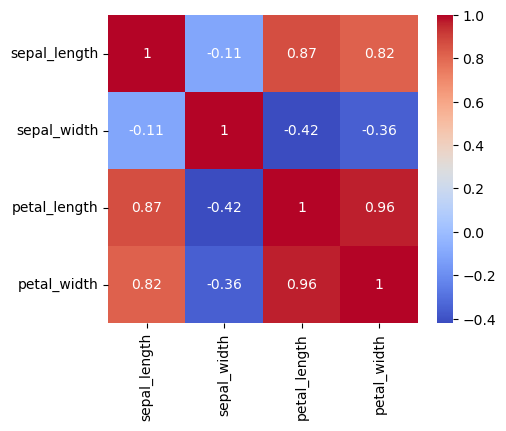

In [29]:
corr = df.corr()
fig,ax = plt.subplots(figsize = (5,4))
sns.heatmap(corr, annot = True, ax = ax, cmap = 'coolwarm')

# Label Encoder
Label Encoder deals with datasets which contain multiple labels in one or more columns. These labels are in the form of words or numbers. Label encoding converts the the labels into numeric form so as to convert it to machine-readable form.

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [98]:
from sklearn.model_selection import train_test_split
# train - 60
# test - 40
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.40)

In [99]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [100]:
model.fit(x_train, y_train)

C:\Users\kaash\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
#Print performance metrics
print('Accuracy: ', model.score(x_test,y_test) * 100)

Accuracy:  95.0


In [110]:
#KNN - K Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
model = KNeighborsClassifier()

In [111]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [112]:
#Print performance metrics
print('Accuracy: ', model.score(x_test,y_test) * 100)

Accuracy:  98.33333333333333


In [113]:
y_pred = model.predict(x_test)

In [118]:
#Print performance metrics
print('Accuracy: ', accuracy_score(y_test,y_pred) * 100)

Accuracy:  98.33333333333333


In [121]:
print(classification_report(y_test, y_pred))
#Precision = TP/TP+FP, Recall = TP/TP+FN, F1 Score = 2xPxR/P+R

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        22

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [130]:
x_train.head(3)

,sepal_length,sepal_width,petal_length,petal_width
134,6.1,2.6,5.6,1.4
121,5.6,2.8,4.9,2.0
61,5.9,3.0,4.2,1.5


In [131]:
new_data = pd.DataFrame({'sepal_length':[6.1],"sepal_width":[2.6],"petal_length":[5.6],"petal_width":[1.4]})

In [132]:
prediction = model.predict(new_data)
print(le.inverse_transform(prediction))

['Iris-virginica']


In [105]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [106]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [107]:
#Print performance metrics
print('Accuracy: ', model.score(x_test,y_test) * 100)

Accuracy:  98.33333333333333
